In [ ]:
pip install pandas

In [ ]:
pip install seaborn

In [2]:
import requests as req
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#https://catalog.beer/api-docs

In [9]:
import os
from dotenv import load_dotenv
load_dotenv()

api_key = os.getenv('clave_api_cervezas')

c1db2224-b148-4504-8327-1e60a38c188e


In [5]:
import requests as req
import base64

In [ ]:
'''
Según la documentación de la api, solo tengo una forma de acceder al objeto "cerveza" y es mediante una llamada con el id del objeto.
Así que el primer paso es sacarme un listado en el que tendré un índice y todos los id de las cervezas. Empleo esta primera llamada
a la api para comprobar que se está realizadon correctamente, y copiaré ésta misma llamada (cambiando los parámetros oportunos) para
realizar las llamadas que me permitan descargar de la api las más de 60.000 respuestas

 '''

In [ ]:
#Defino la URL del endpoint de la api (pongo el count=10000 para que me saque todos los resultados)
url = "https://api.catalog.beer/beer?count=100000"

#Defino la clave API
clave_api = api_key

#Codifico la clave API en base64 según indica la documentación de la api
credenciales = base64.b64encode(f"{clave_api}:".encode()).decode()

#Defino los encabezados de la solicitud según indica la documentación de la api
headers = {
    "Accept": "application/json",
    "Authorization": f"Basic {credenciales}"
}

#Realizo la solicitud GET
response = req.get(url, headers=headers)

#como las primeras veces me estaba dando errores, 
# usé un condicional para saber cuando me daba respuesta ok
if response.status_code == 200:
    datos = response.json()
    print(len(datos["data"]))
else:
    print("Error al obtener los datos:", response.status_code)

60434


In [ ]:
# creo una lista donde iré guardando las respuestas de la api y 
# un contador de iteraciones para saber a tiempo real como va el progreso (ya que al final fueron casi 3 horas)
listado_cervezas = []
contador_iteraciones = 0
for dic in datos["data"]:
  contador_iteraciones += 1
  print(f"Iteración número: {contador_iteraciones}")
  id = dic["id"]
  url = f"https://api.catalog.beer/beer/{id}"

  clave_api = api_key

#Codifico la clave API en base64
  credenciales = base64.b64encode(f"{clave_api}:".encode()).decode()

#Defino los encabezados de la solicitud
  headers = {
    "Accept": "application/json",
    "Authorization": f"Basic {credenciales}"
  }
#Realizo la solicitud GET
  response = req.get(url, headers=headers)

  if response.status_code == 200:
    datos_cerveza = response.json()
    listado_cervezas.append(datos_cerveza)
    while  len(listado_cervezas) > 100:
      break
  else:
    print("Error al obtener los datos:", response.status_code)

In [ ]:
#una vez tengo el listado lo paso directamente a un DataFrame, y lo muestro para ver qué aspecto tiene y que columnas me interesa mantener
df_cervezas = pd.DataFrame(listado_cervezas)
df_cervezas

,id,object,name,style,description,abv,ibu,cb_verified,brewer_verified,last_modified,brewer
0,ed8d5bcd-9016-4954-9f4c-81855dbad55a,beer,¡Ándale! Pale Ale,American-Style Pale Ale,None,5.3,66.0,False,False,1588448205,"{'id': 'aa9ce038-916d-4015-a37c-7aebd3add094',..."
1,64cd7a20-ebf3-4358-bacf-180d1b7d9b96,beer,¡Guava Libre!,American-Style Cream Ale or Lager,None,7.5,NaN,False,False,1588448205,"{'id': '8a9270a4-04cc-46e7-a0ac-00a73325d325',..."
2,5e4bf0c1-c743-4438-9289-6e77c17ad467,beer,¡Magnifico!,Session Beer,None,3.4,40.0,False,False,1588448205,"{'id': 'b95c07fc-769e-4d65-b3f0-2904c8f43d57',..."
3,dddbfc81-4aa5-451c-9539-0774b690b25a,beer,¡Poblamo!,American-Style Amber/Red Ale,None,5.6,NaN,False,False,1588448205,"{'id': '4ae3dd85-7dd2-445f-be67-e5bd1966dd8d',..."
4,bab363fd-8361-4ec4-a0c7-340926fb46f7,beer,¡Santo Dios!,American-Style Stout,None,7.7,37.0,False,False,1588448205,"{'id': 'f796838a-f0fc-4cda-aa3f-6d32ff31a644',..."
...,...,...,...,...,...,...,...,...,...,...,...
60429,f2ea498f-eff6-47df-8694-bf3dc88e0bf7,beer,Zywiec Beer,International-Style Pale Ale,None,5.6,NaN,False,False,1588448205,"{'id': 'f8c72e09-b52a-4628-bec0-68361761dfc6',..."
60430,cd6af1cc-e9d7-4f6f-ac9a-4e7a58e93871,beer,ZZ Hop,Imperial or Double India Pale Ale,None,9.4,140.0,False,False,1588448205,"{'id': 'a0f01603-e679-4d18-bcf7-e85f0ef52553',..."
60431,9ea91e09-b8ae-4159-8e79-a5dd5dc56a8d,beer,ZZ Hop,Imperial or Double India Pale Ale,None,9.4,140.0,False,False,1588448205,"{'id': 'a0f01603-e679-4d18-bcf7-e85f0ef52553',..."
60432,403e9276-76df-4f7b-91ba-916325cc99c4,beer,Атомная прачечная,English-Style India Pale Ale,None,7.0,101.0,False,False,1588448205,"{'id': '199f3293-ad17-4548-839f-8a8becdf527d',..."


In [ ]:
''' 
COLUMNAS
id: es el id interno de la api con el que identifican a la cerveza
object: identifica el tipo de objeto, en la api diferencian entre cerveza y cervecería
name: nombre de la cerveza
style: tipo de cerveza
description: una breve descripción de la cerveza, no muy útil puesto que hay muy pocos valores no null
abv: contenido alcohólico de la cerveza (medido en %)
ibu: índice que mide el grado de amargor de la cerveza, tiene bastantes valores null
cd_verified y brewer_verified: como la api se basa en datos introducidos anónimamente, estas columnas indican si la información subida ha sido verificada
last_modified: indica la última vez que fue modificado el objeto
brewer: nos da un json con un id y nombre de la cervecería que fabrica la cerveza
'''

In [ ]:
#este es el primer listado con los id y nombre de las cervezas (primera llamada a la api)
df = pd.DataFrame(datos["data"])
df

,id,name
0,ed8d5bcd-9016-4954-9f4c-81855dbad55a,¡Ándale! Pale Ale
1,64cd7a20-ebf3-4358-bacf-180d1b7d9b96,¡Guava Libre!
2,5e4bf0c1-c743-4438-9289-6e77c17ad467,¡Magnifico!
3,dddbfc81-4aa5-451c-9539-0774b690b25a,¡Poblamo!
4,bab363fd-8361-4ec4-a0c7-340926fb46f7,¡Santo Dios!
...,...,...
60429,f2ea498f-eff6-47df-8694-bf3dc88e0bf7,Zywiec Beer
60430,cd6af1cc-e9d7-4f6f-ac9a-4e7a58e93871,ZZ Hop
60431,9ea91e09-b8ae-4159-8e79-a5dd5dc56a8d,ZZ Hop
60432,403e9276-76df-4f7b-91ba-916325cc99c4,Атомная прачечная


In [ ]:
'''
consultando la documentación de la api, veo que el objeto cervecería no contiene información relevante,
ya que no tiene datos de localización o capacidad de fabricación, por lo que no veo necesario hacerme con
más información que la del nombre (contiene datos de contacto, como web, facebook, ... pero solo de algunas
de las cervezas con un porcentaje muy bajo)
'''

In [ ]:
# utilizo esta celda para cargar o guardar el dataframe según voy trabajando
# df_cervezas = pd.read_csv("/content/drive/MyDrive/datos/cervezas.csv")
#df_cervezas.to_csv("/content/drive/MyDrive/datos/cervezas.csv", index=False)

In [ ]:
#con esta línea convierto la cadena de texto guardada en la columna en diccionario, 
#que a continuación utilizaré para sacar el nombre de la cervecería
df_cervezas['brewer'] = df_cervezas['brewer'].apply(eval)

In [ ]:
df_cervezas['brewer_name'] = df_cervezas['brewer'].apply(lambda x: x.get('name'))

In [ ]:
#me quedo con las columnas con las que voy a trabajar
df_cervezas = df_cervezas[["name", "style", "abv", "ibu", "brewer_name"]]

In [ ]:
df_cervezas

,name,style,description,abv,ibu,brewer_name
0,¡Ándale! Pale Ale,American-Style Pale Ale,NaN,5.3,66.0,Frothy Beard Brewing Company
1,¡Guava Libre!,American-Style Cream Ale or Lager,NaN,7.5,NaN,Urban Family Brewing
2,¡Magnifico!,Session Beer,NaN,3.4,40.0,Pretty Things Beer & Ale Project
3,¡Poblamo!,American-Style Amber/Red Ale,NaN,5.6,NaN,Agrarian Ales
4,¡Santo Dios!,American-Style Stout,NaN,7.7,37.0,Great Northern Brewing Company
...,...,...,...,...,...,...
60429,Zywiec Beer,International-Style Pale Ale,NaN,5.6,NaN,Żywiec Brewery
60430,ZZ Hop,Imperial or Double India Pale Ale,NaN,9.4,140.0,Auburn Alehouse
60431,ZZ Hop,Imperial or Double India Pale Ale,NaN,9.4,140.0,Auburn Alehouse
60432,Атомная прачечная,English-Style India Pale Ale,NaN,7.0,101.0,Jaws Brewery


In [ ]:
# guardo la información en un archivo csv para tener un backup si fuera necesario
df_cervezas.to_csv("cervezas_final.csv", index=False)

In [69]:
#para empezar a limpiar los datos, voy a eliminar aquellos que o son completamente nulos o están duplicados
df_cervezas.drop_duplicates(inplace=True)
df_cervezas.dropna(how='all', inplace=True)

In [ ]:
# con .info voy a mostrar los null que me aparecen y los tipos de datos que tengo
df_cervezas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57667 entries, 0 to 60433
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         57667 non-null  object 
 1   style        57667 non-null  object 
 2   abv          57667 non-null  float64
 3   ibu          25831 non-null  float64
 4   brewer_name  57667 non-null  object 
 5   tipo         57667 non-null  object 
dtypes: float64(2), object(4)
memory usage: 3.1+ MB


In [ ]:
#compruebo que en la columna ibu tengo muchos nulos, vamos a investigar a qué se debe
df_cervezas[(df_cervezas.ibu.isnull())]

,name,style,abv,ibu,brewer_name,tipo
8,.38 Special Bitter,Ordinary Bitter,3.8,NaN,Sullivan's Black Forest Brew Haus & Grill,Bitter
28,'Rillo Nugz,Session Beer,3.0,NaN,Four Corners Brewing Company,Session
32,'Tis a Pity,Extra Special Bitter,6.1,NaN,Kindred Artisan Ales,Bitter
43,‘Til Sunset,Session Beer,4.7,NaN,Lickinghole Creek Craft Brewery,Session
61,"""Mary Lee Please Don't Eat Me"" Saison Ale",French & Belgian-Style Saison,5.0,NaN,Ship Bottom Brewery,Session
...,...,...,...,...,...,...
57561,Zoller-Hof Festbier,German-Style Oktoberfest / Wiesen (Meadow),5.7,NaN,Brauerei Zoller-Hof,Mead
57570,Zom-bier Pumpkin Ale,Pumpkin Beer,6.0,NaN,Grand River Brewery,Pumpkin
57573,Zombie Killer Cherry Cyser,Open Category Mead,5.5,NaN,B. Nektar Meadery,Mead
57578,Zombies Take Manhattan,Dry Mead,12.0,NaN,B. Nektar Meadery,Mead


In [ ]:
''' 
una vez he explorado los datos que tengo para ver como puedo rellenar los null y permitirme trabajar con el dataframe,
decido realizar 2 acciones:
1. voy a crear una nueva columna, en la que pueda agrupar los "style" ya que tengo demasiados valores únicos, 
en este caso la columna será "tipo" y tendrá el tipo de dato categórico
2. con los datos de la columna tipo voy a rellenar los null de la columna ibu con datos de la media ibu de cada
uno de los tipos según una búsqueda de información realizada
'''

In [97]:
df_cervezas['tipo'] = ''

df_cervezas.loc[df_cervezas['style'].str.contains('Bock'), 'tipo'] = 'Lager'
df_cervezas.loc[df_cervezas['style'].str.contains('Schwarzbier'), 'tipo'] = 'Lager'
df_cervezas.loc[df_cervezas['style'].str.contains('Märzen'), 'tipo'] = 'Lager'
df_cervezas.loc[df_cervezas['style'].str.contains('Kölsch'), 'tipo'] = 'Kolsch'
df_cervezas.loc[df_cervezas['style'].str.contains('Hefeweissbier'), 'tipo'] = 'Wheat'
df_cervezas.loc[df_cervezas['style'].str.contains('Saison'), 'tipo'] = 'Session'
df_cervezas.loc[df_cervezas['style'].str.contains('Session '), 'tipo'] = 'Session'
df_cervezas.loc[df_cervezas['style'].str.contains('Lambic'), 'tipo'] = 'Lambic'
df_cervezas.loc[df_cervezas['style'].str.contains('Wheat'), 'tipo'] = 'Wheat'
df_cervezas.loc[df_cervezas['style'].str.contains('Porter'), 'tipo'] = 'Porter'
df_cervezas.loc[df_cervezas['style'].str.contains('Bitter'), 'tipo'] = 'Bitter'
df_cervezas.loc[df_cervezas['style'].str.contains('Stout'), 'tipo'] = 'Stout'
df_cervezas.loc[df_cervezas['style'].str.contains('Barleywine'), 'tipo'] = 'Barleywine'
df_cervezas.loc[df_cervezas['style'].str.contains('Ale'), 'tipo'] = 'Ale'
df_cervezas.loc[df_cervezas['style'].str.contains('India Pale Ale'), 'tipo'] = 'India Pale Ale'
df_cervezas.loc[df_cervezas['style'].str.contains('Pilsener'), 'tipo'] = 'Lager'
df_cervezas.loc[df_cervezas['style'].str.contains('Lager'), 'tipo'] = 'Lager'


In [98]:
df_cervezas.loc[df_cervezas['style'].str.contains('Gose'), 'tipo'] = 'Lager'
df_cervezas.loc[df_cervezas['style'].str.contains('Doppelbock'), 'tipo'] = 'Lager'
df_cervezas.loc[df_cervezas['style'].str.contains('Dubbel'), 'tipo'] = 'Trappist'
df_cervezas.loc[df_cervezas['style'].str.contains('Tripel'), 'tipo'] = 'Trappist'
df_cervezas.loc[df_cervezas['style'].str.contains('Weissbock'), 'tipo'] = 'Lager'
df_cervezas.loc[df_cervezas['style'].str.contains('Dunkel'), 'tipo'] = 'Lager'
df_cervezas.loc[df_cervezas['style'].str.contains('Fruit'), 'tipo'] = 'Fruit'
df_cervezas.loc[df_cervezas['style'].str.contains('Cider'), 'tipo'] = 'Cider'
df_cervezas.loc[df_cervezas['style'].str.contains('Mead'), 'tipo'] = 'Mead'
df_cervezas.loc[df_cervezas['style'].str.contains('Flavored'), 'tipo'] = 'Special'
df_cervezas.loc[df_cervezas['style'].str.contains('Quadrupel'), 'tipo'] = 'Trappist'
df_cervezas.loc[df_cervezas['style'].str.contains('IPA'), 'tipo'] = 'India Pale Ale'
df_cervezas.loc[df_cervezas['style'].str.contains('Pumpkin'), 'tipo'] = 'Pumpkin'
df_cervezas.loc[df_cervezas['style'].str.contains('Herb and Spice'), 'tipo'] = 'Special'
df_cervezas.loc[df_cervezas['style'].str.contains('Wood'), 'tipo'] = 'Stout'
df_cervezas.loc[df_cervezas['style'].str.contains('Specialty '), 'tipo'] = 'Special'
df_cervezas.loc[df_cervezas['style'].str.contains('Altbier'), 'tipo'] = 'Mead'


In [99]:
df_cervezas.loc[df_cervezas['style'].str.contains('Braggot'), 'tipo'] = 'Kolsch'
df_cervezas.loc[df_cervezas['style'].str.contains('Dortmunder'), 'tipo'] = 'Lager'
df_cervezas.loc[df_cervezas['style'].str.contains('Helles'), 'tipo'] = 'Lager'
df_cervezas.loc[df_cervezas['style'].str.contains('Kristall'), 'tipo'] = 'Wheat'
df_cervezas.loc[df_cervezas['style'].str.contains('Wild'), 'tipo'] = 'Ale'
df_cervezas.loc[df_cervezas['style'].str.contains('Chili'), 'tipo'] = 'Special'
df_cervezas.loc[df_cervezas['style'].str.contains('Common'), 'tipo'] = 'Lager'
df_cervezas.loc[df_cervezas['style'].str.contains('Garde'), 'tipo'] = 'Ale'
df_cervezas.loc[df_cervezas['style'].str.contains('Brett'), 'tipo'] = 'India Pale Ale'
df_cervezas.loc[df_cervezas['style'].str.contains('Leichtbier'), 'tipo'] = 'Lager'
df_cervezas.loc[df_cervezas['style'].str.contains('Leichtes'), 'tipo'] = 'Lager'

In [100]:
df_cervezas.loc[df_cervezas['style'].str.contains('Cyser'), 'tipo'] = 'Cider'
df_cervezas.loc[df_cervezas['style'].str.contains('Gluten'), 'tipo'] = 'Gluten Free'
df_cervezas.loc[df_cervezas['style'].str.contains('Eisbock'), 'tipo'] = 'Lager'
df_cervezas.loc[df_cervezas['style'].str.contains('Weizen'), 'tipo'] = 'Wheat'
df_cervezas.loc[df_cervezas['style'].str.contains('Raspberries'), 'tipo'] = 'Fruit'
df_cervezas.loc[df_cervezas['style'].str.contains('Metheglin'), 'tipo'] = 'Mead'
df_cervezas.loc[df_cervezas['style'].str.contains('Grodziskie'), 'tipo'] = 'Wheat'
df_cervezas.loc[df_cervezas['style'].str.contains('Field'), 'tipo'] = 'Special'
df_cervezas.loc[df_cervezas['style'].str.contains('Table'), 'tipo'] = 'Lager'
df_cervezas.loc[df_cervezas['style'].str.contains('Adambier'), 'tipo'] = 'Ale'
df_cervezas.loc[df_cervezas['style'].str.contains('Historical'), 'tipo'] = 'Stout'
df_cervezas.loc[df_cervezas['style'].str.contains('Apple'), 'tipo'] = 'Cider'
df_cervezas.loc[df_cervezas['style'].str.contains('Malt'), 'tipo'] = 'Lager'

In [101]:
df_cervezas.loc[df_cervezas['style'].str.contains('Ginjo'), 'tipo'] = 'Special'
df_cervezas.loc[df_cervezas['style'].str.contains('Quad'), 'tipo'] = 'Trappist'
df_cervezas.loc[df_cervezas['style'].str.contains('Oktoberfest'), 'tipo'] = 'Lager'
df_cervezas.loc[df_cervezas['style'].str.contains('Pilsner'), 'tipo'] = 'Lager'
df_cervezas.loc[df_cervezas['style'].str.contains('PILSNER'), 'tipo'] = 'Lager'
df_cervezas.loc[df_cervezas['style'].str.contains('Perry'), 'tipo'] = 'Fruit'
df_cervezas.loc[df_cervezas['style'].str.contains('Singel'), 'tipo'] = 'Trappist'
df_cervezas.loc[df_cervezas['style'].str.contains('Spiced'), 'tipo'] = 'Special'
df_cervezas.loc[df_cervezas['style'].str.contains('Single'), 'tipo'] = 'Trappist'
df_cervezas.loc[df_cervezas['style'].str.contains('Blonde'), 'tipo'] = 'Lager'
df_cervezas.loc[df_cervezas['style'].str.contains('PORTER'), 'tipo'] = 'Porter'
df_cervezas.loc[df_cervezas['style'].str.contains('Grape'), 'tipo'] = 'Fruit'
df_cervezas.loc[df_cervezas['style'].str.contains('Kuit'), 'tipo'] = 'Ale'
df_cervezas.loc[df_cervezas['style'].str.contains('Stop'), 'tipo'] = 'Special'
df_cervezas.loc[df_cervezas['style'].str.contains('Orange'), 'tipo'] = 'Fruit'
df_cervezas.loc[df_cervezas['style'].str.contains('Sour'), 'tipo'] = 'Ale'
df_cervezas.loc[df_cervezas['style'].str.contains('Strong'), 'tipo'] = 'Ale'
df_cervezas.loc[df_cervezas['style'].str.contains('Wit'), 'tipo'] = 'Wheat'
df_cervezas.loc[df_cervezas['style'].str.contains('infused'), 'tipo'] = 'Ale'
df_cervezas.loc[df_cervezas['style'].str.contains('Amber'), 'tipo'] = 'Ale'

In [102]:
df_cervezas[df_cervezas['tipo'] == '']

,name,style,abv,ibu,brewer_name,tipo


In [103]:
df_cervezas.loc[(df_cervezas['tipo'] == 'Lambic') & (df_cervezas['ibu'].isna()), 'ibu'] = 5.0
df_cervezas.loc[(df_cervezas['tipo'] == 'Wheat') & (df_cervezas['ibu'].isna()), 'ibu'] = 13.0
df_cervezas.loc[(df_cervezas['tipo'] == 'Lager') & (df_cervezas['ibu'].isna()), 'ibu'] = 17.0
df_cervezas.loc[(df_cervezas['tipo'] == 'Kolsch') & (df_cervezas['ibu'].isna()), 'ibu'] = 25.0
df_cervezas.loc[(df_cervezas['tipo'] == 'Porter') & (df_cervezas['ibu'].isna()), 'ibu'] = 34.0
df_cervezas.loc[(df_cervezas['tipo'] == 'Stout') & (df_cervezas['ibu'].isna()), 'ibu'] = 60.0
df_cervezas.loc[(df_cervezas['tipo'] == 'Ale') & (df_cervezas['ibu'].isna()), 'ibu'] = 40.0
df_cervezas.loc[(df_cervezas['tipo'] == 'India Pale Ale') & (df_cervezas['ibu'].isna()), 'ibu'] = 80.0
df_cervezas.loc[(df_cervezas['tipo'] == 'Pilsener') & (df_cervezas['ibu'].isna()), 'ibu'] = 34.0
df_cervezas.loc[(df_cervezas['tipo'] == 'Trappist') & (df_cervezas['ibu'].isna()), 'ibu'] = 25.0
df_cervezas.loc[(df_cervezas['tipo'] == 'Fruit') & (df_cervezas['ibu'].isna()), 'ibu'] = 17.0
df_cervezas.loc[(df_cervezas['tipo'] == 'Pumpkin') & (df_cervezas['ibu'].isna()), 'ibu'] = 20.0
df_cervezas.loc[(df_cervezas['tipo'] == 'Wheat') & (df_cervezas['ibu'].isna()), 'ibu'] = 15.0
df_cervezas.loc[(df_cervezas['tipo'] == 'Bitter') & (df_cervezas['ibu'].isna()), 'ibu'] = 37.0
df_cervezas.loc[(df_cervezas['tipo'] == 'Session') & (df_cervezas['ibu'].isna()), 'ibu'] = 55.0
df_cervezas.loc[(df_cervezas['tipo'] == 'Mead') & (df_cervezas['ibu'].isna()), 'ibu'] = 1.0
df_cervezas.loc[(df_cervezas['tipo'] == 'Special') & (df_cervezas['ibu'].isna()), 'ibu'] = 52.5
df_cervezas.loc[(df_cervezas['tipo'] == 'Cider') & (df_cervezas['ibu'].isna()), 'ibu'] = 1.0
df_cervezas.loc[(df_cervezas['tipo'] == 'Gluten Free') & (df_cervezas['ibu'].isna()), 'ibu'] = 30.0

In [ ]:
#una vez creada la columna tipo y rellenados todos los null convierto el tipo de dato en categórico
df_cervezas['tipo'] = df_cervezas['tipo'].astype('category')

In [ ]:
#comprobado que las modificaciones se han aplicado correctamente, paso a guardar la información en el csv que empleo como backup
df_cervezas.to_csv("cervezas_final.csv", index=False)

In [168]:
df_cervezas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57667 entries, 0 to 57666
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   name         57667 non-null  object  
 1   style        57667 non-null  object  
 2   abv          57667 non-null  float64 
 3   ibu          57667 non-null  float64 
 4   brewer_name  57667 non-null  object  
 5   tipo         57667 non-null  category
dtypes: category(1), float64(2), object(3)
memory usage: 2.3+ MB


In [ ]:
'''una vez terminado el proceso de limpieza y exploración de los datos, comienzo a lanzar gráficos
    para empezar a estudiar la distribución de los datos
'''

<Axes: xlabel='abv', ylabel='Count'>

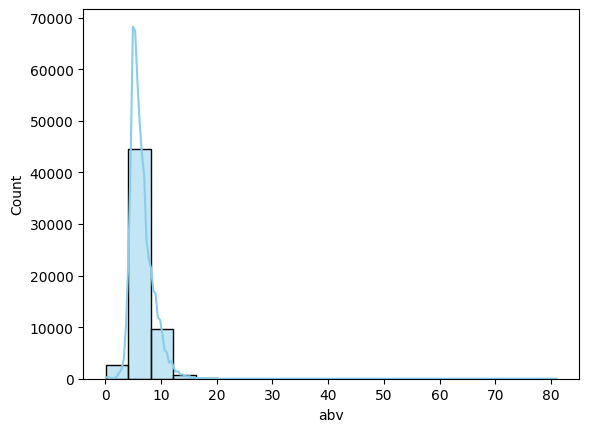

In [164]:
sns.histplot(df_cervezas['abv'], bins=20, kde=True, color='skyblue')

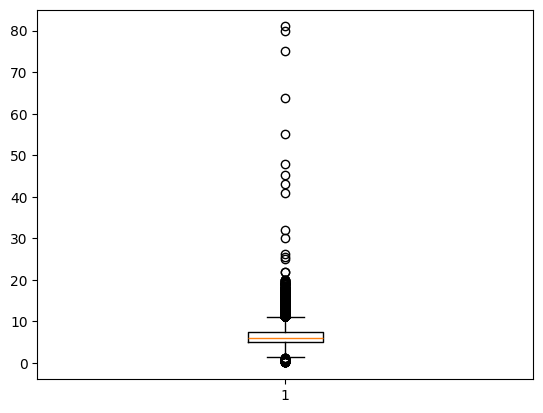

In [178]:
plt.boxplot(df_cervezas['abv']);


In [173]:
df_cervezas[(df_cervezas.abv > 30 )]

,name,style,abv,ibu,brewer_name,tipo
8365,Border Battle Porter,Brown Porter,81.0,57.0,North River Brewing Company,Porter
13747,Crunchy Hippie,American-Style Brown Ale,63.8,40.0,Earnest Brew Works,Ale
18042,Everything Rhymes With Orange,American-Style India Pale Ale,80.0,50.0,Roughtail Brewing Company,India Pale Ale
21444,Golden Mustache,Dortmunder / European-Style Export,55.0,26.0,Oak Highlands Brewery,Lager
28714,Kicking Back,American-Style Pale Ale,48.0,4.0,Wellington Brewery,Ale
33111,Midnight Cab,French & Belgian-Style Saison,75.0,55.0,Rahr & Sons Brewing Company,Session
46677,Sink the Bismarck,Imperial or Double India Pale Ale,41.0,40.0,BrewDog,India Pale Ale
49286,Strange Fella's Helles,German-Style Pilsener,45.3,19.0,Worth Brewing Company,Pilsener
50428,Tactical Nuclear Penguin,American-Style Imperial Stout,32.0,60.0,BrewDog,Stout
53562,Tweedle Weiss,Berliner-Style Weisse (Wheat),43.0,5.0,Wonderland Brewing Company,Wheat


<Axes: xlabel='ibu', ylabel='Count'>

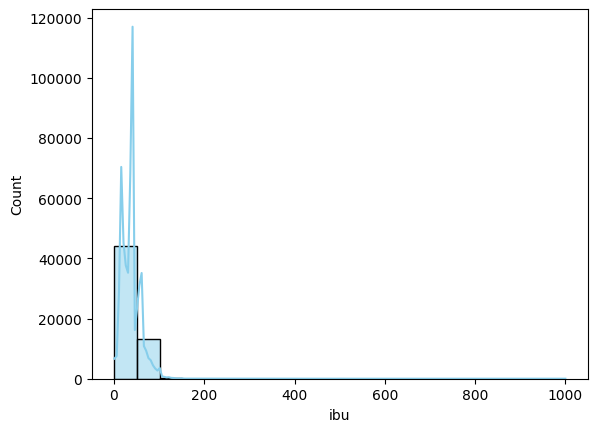

In [165]:
sns.histplot(df_cervezas['ibu'], bins=20, kde=True, color='skyblue')

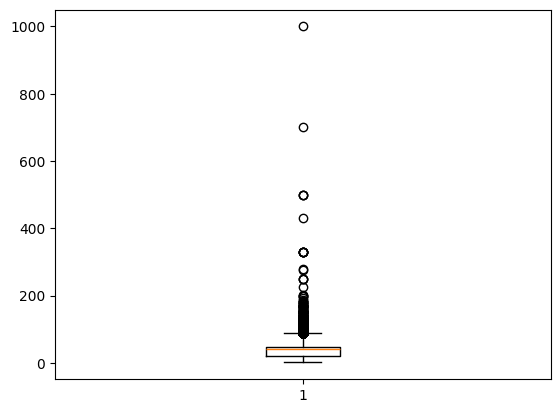

In [177]:
plt.boxplot(df_cervezas['ibu']);

In [166]:
df_cervezas[(df_cervezas.ibu > 150 )]

,name,style,abv,ibu,brewer_name,tipo
251,1000 IBU,Imperial or Double India Pale Ale,12.2,1000.0,Mikkeller,India Pale Ale
1057,7 Century,Imperial or Double India Pale Ale,10.5,700.0,7 Cent Brewery,India Pale Ale
1126,8+35=20 Pilot Project,American-Style Imperial Stout,12.0,175.0,White Birch Brewing,Stout
1408,Abner,Imperial or Double India Pale Ale,8.2,170.0,Hill Farmstead Brewery,India Pale Ale
1695,Agnus Tripel Ale,Belgian-Style Tripel,7.5,330.0,Brouwerij Corsendonk,Trappist
2191,AM:PM,Session India Pale Ale,4.5,330.0,Thornbridge Brewery,India Pale Ale
2362,Amber Lager,Aged Beer (Ale or Lager),4.3,500.0,Galway Hooker,Lager
6166,Big 'N Beardy,American-Style Imperial Stout,9.8,155.0,7 Cent Brewery,Stout
6307,Big Four,Specialty Beer,10.0,168.0,Track 7 Brewing Company,Special
10832,Catalyst,Imperial or Double India Pale Ale,9.6,160.0,Texas Beer Refinery,India Pale Ale


In [170]:
df_cervezas.to_csv("cervezas_final.csv", index=False)

In [ ]:
'''el ibu, como se comentó anteriormente es un índice que mide el amargor de la cerveza. 
Dicha definición no es del todo correcta, ya que en realidad es un índice de lupulización.
El lúpulo es un aditivo natural de la cerveza, no presente en otras bebidas fermentadas, 
como son la sidra o la hidromiel (Mead), por lo que para no excluir dichas bebidas del dataset,
voy a normalizar su medida ibu en 1
'''

In [ ]:
df_cervezas.loc[df_cervezas['tipo'] == 'Cider', 'ibu'] = 1
df_cervezas.loc[df_cervezas['tipo'] == 'Mead', 'ibu'] = 1

In [44]:
df_cervezas[(df_cervezas.ibu<2)]

,name,style,abv,ibu,brewer_name,tipo
85,“Conquered” Grape BzZz,Sweet Mead,6.0,1.0,Acoustic Draft Mead,Mead
96,(512) ALT,German-Style Altbier,6.0,1.0,(512) Brewing Company,Mead
232,100 Barrel Series #5 Alt,German-Style Altbier,5.3,1.0,Harpoon Brewery,Mead
263,10th Anniversary,Imperial or Double India Pale Ale,10.0,1.0,Port Brewing Company,India Pale Ale
457,19 Original Colonies,Open Category Mead,5.5,1.0,Rogue Ales,Mead
...,...,...,...,...,...,...
57484,Zen Berry,Fruit Cider,5.0,1.0,Ciderboys Cider Co.,Cider
57513,Zesty Blood Orange,Fruit Cider,4.0,1.0,Bulmers Cider,Cider
57561,Zoller-Hof Festbier,German-Style Oktoberfest / Wiesen (Meadow),5.7,1.0,Brauerei Zoller-Hof,Lager
57573,Zombie Killer Cherry Cyser,Open Category Mead,5.5,1.0,B. Nektar Meadery,Mead


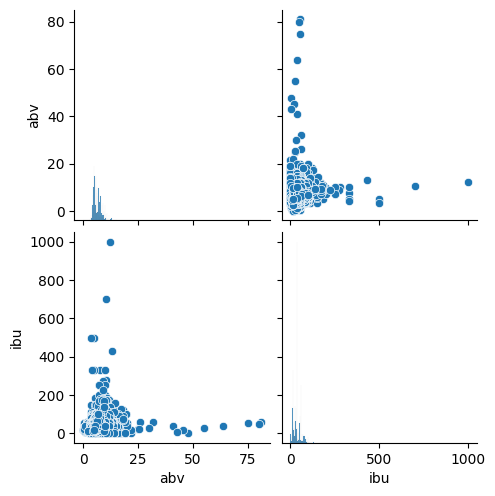

In [171]:
sns.pairplot(df_cervezas)

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_15228\2409459842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=conteo_tipos.index, x=conteo_tipos.values, palette="viridis");


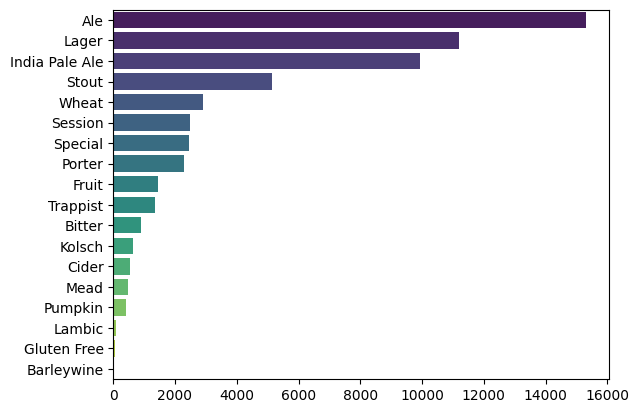

In [93]:
conteo_tipos = df_cervezas.tipo.value_counts()
sns.barplot(y=conteo_tipos.index, x=conteo_tipos.values, palette="viridis");
#plt.xticks(rotation=45);

plt.xlabel('');
plt.ylabel('');

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_15228\393060745.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=conteo_tipos.index, x=conteo_tipos.values, palette="viridis")


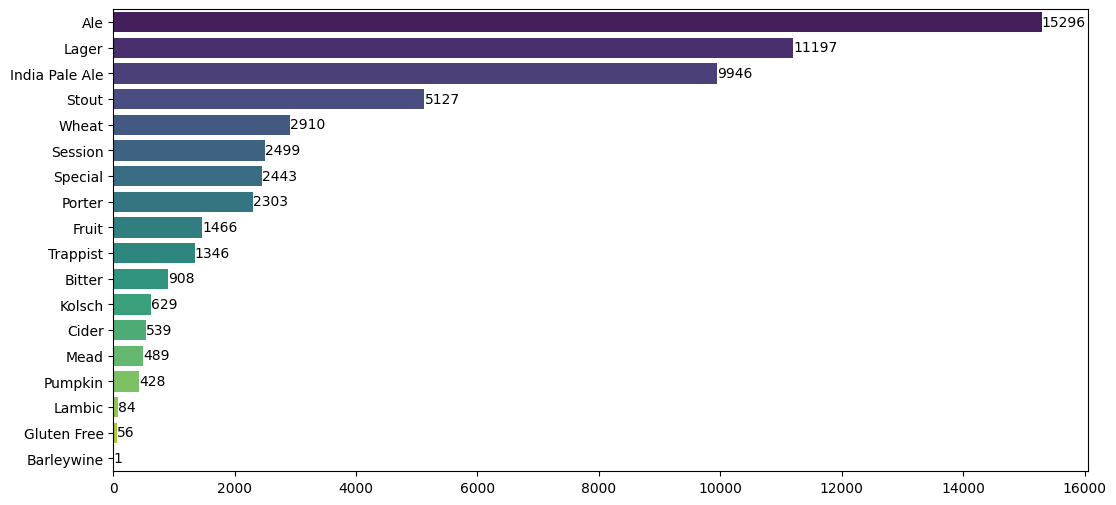

In [94]:
conteo_tipos = df_cervezas['tipo'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=conteo_tipos.index, x=conteo_tipos.values, palette="viridis")
plt.subplots_adjust(right=1.1)
plt.ylabel('');

for i, (value, name) in enumerate(zip(conteo_tipos.values, conteo_tipos.index)):
    ax.text(value, i, f'{value}', ha='left', va='center')

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_15228\1674536444.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y=porcentajes.index, x=porcentajes.values, palette="viridis")


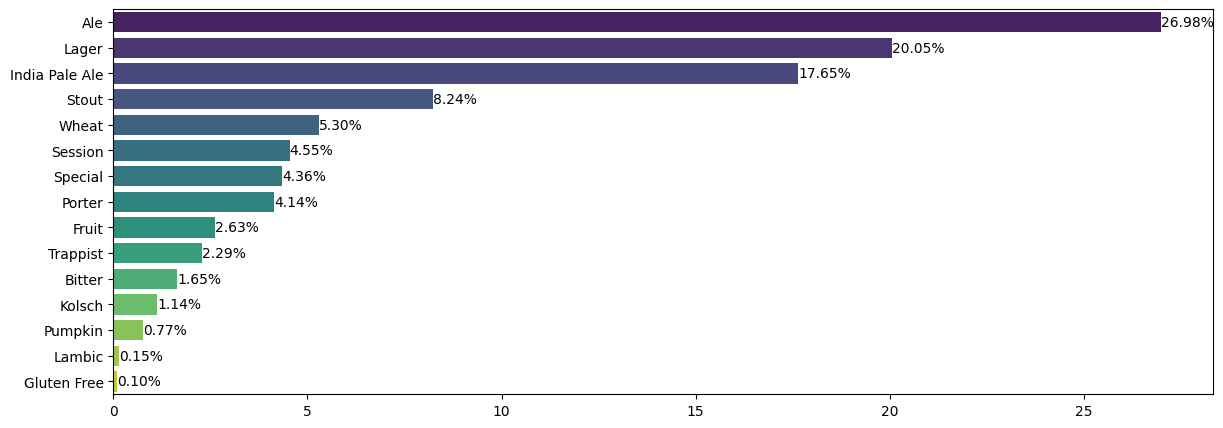

In [40]:
conteo_tipos = df_cervezas['tipo'].value_counts()
porcentajes = (conteo_tipos / conteo_tipos.sum()) * 100

plt.figure(figsize=(8, 5))
bars = sns.barplot(y=porcentajes.index, x=porcentajes.values, palette="viridis")
plt.xlabel('');
plt.ylabel('');
plt.subplots_adjust(right=1.5)
for bar, porcentaje in zip(bars.patches, porcentajes.values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{porcentaje:.2f}%', 
             ha='left', va='center', fontsize=10, color='black')

In [ ]:
# voy a hacer un df con los valores de ibu que pasan de 110, 
# ya que estos valores son los que sobrepasan el valor perceptible por las personas
atipicos_ibu = df_cervezas[(df_cervezas.ibu > 110)]
atipicos_ibu

,name,style,abv,ibu,brewer_name,tipo
39,‘BARLEY LEGAL’ BARLEYWINE,American-Style Barley Wine Ale,14.2,121.0,Dunsmuir Brewery Works,Ale
179,1.21 Gigawatts,Belgian-Style Pale Strong Ale,10.1,150.0,Bier Brewery & Taproom,Ale
208,10/6th IPA,American-Style India Pale Ale,7.2,111.0,White Rabbit Brewing Company,India Pale Ale
251,1000 IBU,Imperial or Double India Pale Ale,12.2,1000.0,Mikkeller,India Pale Ale
295,120 Minute IPA,Imperial or Double India Pale Ale,18.0,120.0,Dogfish Head Craft Brewery,India Pale Ale
...,...,...,...,...,...,...
55658,Wham Bam Thank You Ma'am,Imperial or Double India Pale Ale,10.5,120.0,Susquehanna Brewing Company,India Pale Ale
55677,What The Floc,Imperial or Double India Pale Ale,9.5,170.0,Liquid Hero Brewery,India Pale Ale
56956,Workers Are Going Home,Imperial or Double India Pale Ale,8.0,122.0,Singlecut Beersmiths,India Pale Ale
57445,Zacks IIPA,Imperial or Double India Pale Ale,9.0,121.0,Knee Deep Brewing Company,India Pale Ale


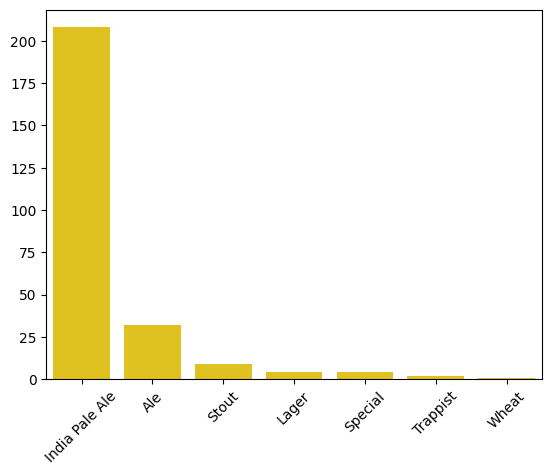

In [107]:
#podemos ver que en cuanto a los tipos de cerveza que  tienen los valores ibu más elevados, 
#encontramos a la Indian Pale Ale y a la Ale (en segundo lugar con una gran diferencia)
orden_tipos = atipicos_ibu['tipo'].value_counts().index;
sns.countplot(data=atipicos_ibu, x='tipo', order=orden_tipos);
plt.xticks(rotation=45);
plt.xlabel('');
plt.ylabel('');

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_15228\1767119914.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=atipicos_ibu, y='tipo', order=orden_tipos, palette="viridis")


Text(0.5, 0, '')

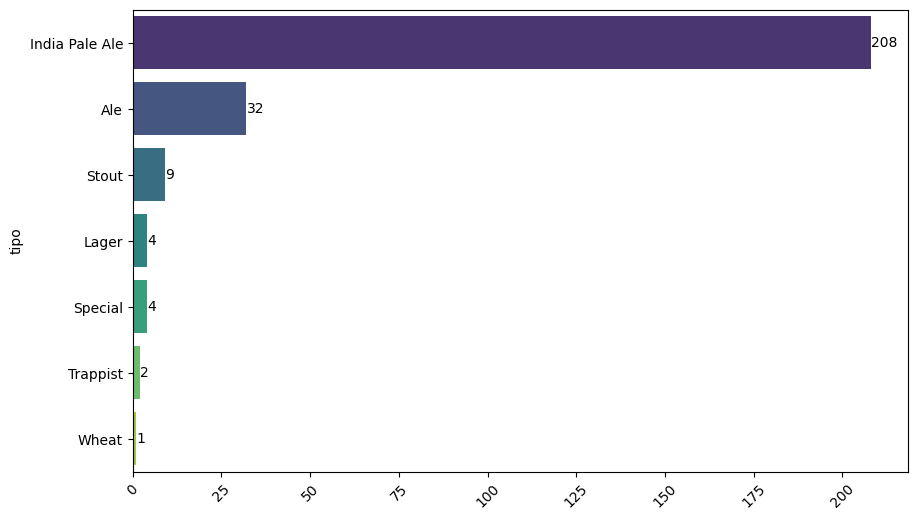

In [109]:
orden_tipos = atipicos_ibu['tipo'].value_counts().index

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=atipicos_ibu, y='tipo', order=orden_tipos, palette="viridis")

for i, v in enumerate(atipicos_ibu['tipo'].value_counts()):
    ax.text(v + 0.1, i, str(v), ha='left', va='center')

plt.xlabel('')

In [55]:
max_ibu_por_tipo = atipicos_ibu.groupby('tipo')['ibu'].max()
max_ibu_por_tipo

Series([], Name: ibu, dtype: float64)

In [ ]:
# sin embargo, teniendo en cuenta los valores de ibu que hemos comentado antes y el porcentaje de cervezas de este tipo que 
# se producen (inferior al 1%) podemos concluir que la fabricación de las mismas se trata de reclamos comerciales
numero_atipicos_ibu = len(atipicos_ibu)
total_cervezas = len(df_cervezas)
porcentaje_atipicos_ibu = (numero_atipicos_ibu / total_cervezas) * 100
porcentaje_atipicos_ibu = round(porcentaje_atipicos_ibu, 2)
porcentaje_atipicos_ibu

0.0

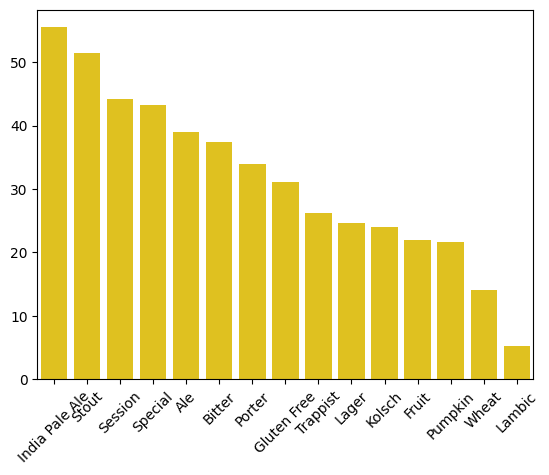

In [56]:
media_ibu_por_tipo = df_cervezas.groupby('tipo')['ibu'].mean().sort_values(ascending=False)
sns.barplot(x=media_ibu_por_tipo.index, y=media_ibu_por_tipo.values)
plt.xticks(rotation=45);
plt.xlabel('');

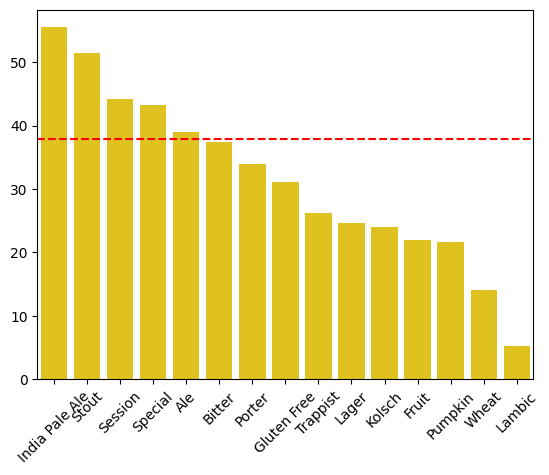

In [57]:
media_total_ibu = df_cervezas['ibu'].mean()
media_ibu_por_tipo = df_cervezas.groupby('tipo')['ibu'].mean().sort_values(ascending=False)
sns.barplot(x=media_ibu_por_tipo.index, y=media_ibu_por_tipo.values)
plt.axhline(media_total_ibu, color='red', linestyle='--', label=f'Media total: {media_total_ibu:.2f}')
plt.xlabel('');
plt.xticks(rotation=45);

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_15228\3029115455.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=media_ibu_por_tipo.index, x=media_ibu_por_tipo.values, palette="viridis")


Text(0, 0.5, '')

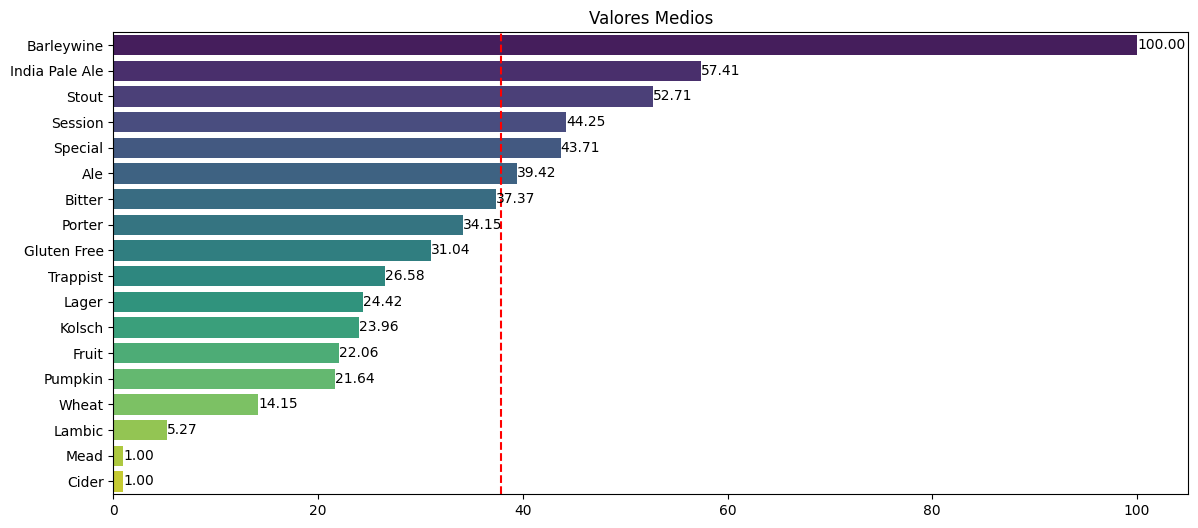

In [97]:
# Calcular la media total de IBU
media_total_ibu = df_cervezas['ibu'].mean()

# Calcular la media de IBU por tipo y ordenarla
media_ibu_por_tipo = df_cervezas.groupby('tipo')['ibu'].mean().sort_values(ascending=False)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=media_ibu_por_tipo.index, x=media_ibu_por_tipo.values, palette="viridis")

# Añadir una línea horizontal para la media total de IBU
plt.axvline(media_total_ibu, color='red', linestyle='--', label=f'Media total: {media_total_ibu:.2f}')
plt.subplots_adjust(right=1.2)

# Añadir anotaciones de los valores encima de las barras
for i, (value, name) in enumerate(zip(media_ibu_por_tipo.values, media_ibu_por_tipo.index)):
    ax.text(value, i, f'{value:.2f}', ha='left', va='center')

plt.title('Valores Medios')
ax.set_ylabel('')


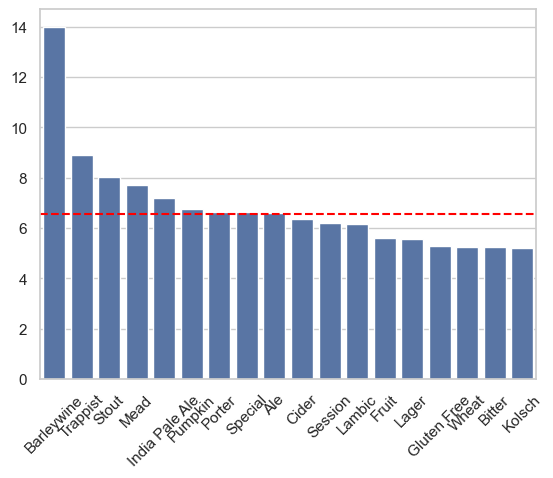

In [143]:
media_abv_por_tipo = df_cervezas.groupby('tipo')['abv'].mean().sort_values(ascending=False)
media_total_abv = df_cervezas['abv'].mean()

sns.barplot(x=media_abv_por_tipo.index, y=media_abv_por_tipo.values)
plt.axhline(media_total_abv, color='red', linestyle='--', label=f'Media total: {media_total_abv:.2f}')
plt.xlabel('');
plt.xticks(rotation=45);

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_15228\1261501178.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=media_abv_por_tipo.index, x=media_abv_por_tipo.values, palette="viridis")


Text(0.5, 1.0, 'Valores Medios')

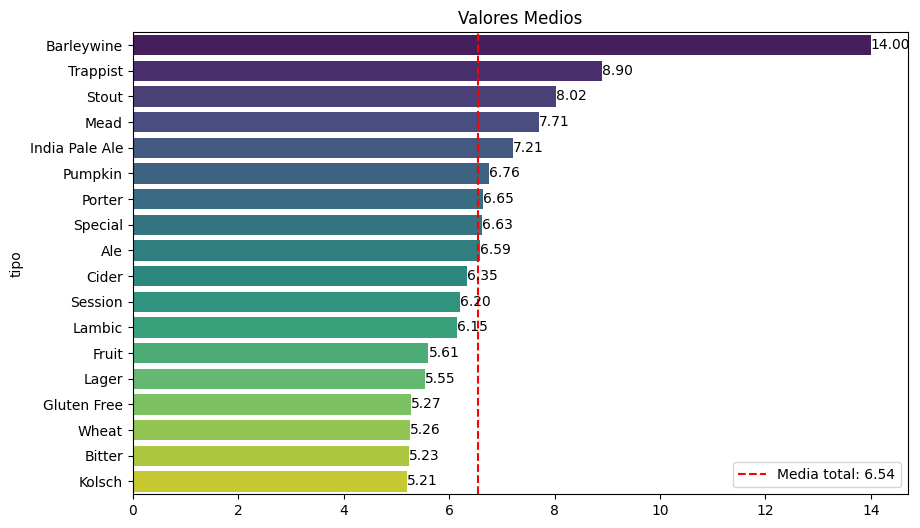

In [98]:

# Calcular la media total de ABV
media_total_abv = df_cervezas['abv'].mean()

# Calcular la media de ABV por tipo y ordenarla
media_abv_por_tipo = df_cervezas.groupby('tipo')['abv'].mean().sort_values(ascending=False)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=media_abv_por_tipo.index, x=media_abv_por_tipo.values, palette="viridis")

# Añadir una línea horizontal para la media total de ABV
plt.axvline(media_total_abv, color='red', linestyle='--', label=f'Media total: {media_total_abv:.2f}')

# Añadir anotaciones de los valores encima de las barras
for i, (value, name) in enumerate(zip(media_abv_por_tipo.values, media_abv_por_tipo.index)):
    ax.text(value, i, f'{value:.2f}', ha='left', va='center')

# Eliminar etiquetas de los ejes
ax.set_xlabel('')


# Añadir una leyenda para la línea de la media total
plt.legend()

# Añadir título al gráfico
plt.title('Valores Medios')

In [90]:
media_ibu_por_tipo


tipo
India Pale Ale    55.517624
Stout             51.499112
Session           44.240547
Special           43.192405
Ale               38.947725
Bitter            37.378319
Porter            34.023873
Gluten Free       31.035714
Trappist          26.226475
Lager             24.627075
Kolsch            23.975923
Fruit             22.020557
Pumpkin           21.637441
Wheat             14.136097
Lambic             5.277108
Name: ibu, dtype: float64

In [ ]:
#en cuanto a los valores de ibu inferiores a 2, podemos ver que no son cervezas, como comentamos anteriormente, 
# y en su mayoría, solo encontraríamos de forma muy residual algunas Lager
inferior_ibu = df_cervezas[(df_cervezas.ibu < 2)]
inferior_ibu.sort_values(by='tipo')
inferior_ibu['tipo'].value_counts().nlargest(3)

tipo
Cider    539
Mead     489
Lager    110
Name: count, dtype: int64

In [100]:
inferior_ibu = df_cervezas[(df_cervezas.ibu < 2)]
inferior_ibu

,name,style,abv,ibu,brewer_name,tipo
85,“Conquered” Grape BzZz,Sweet Mead,6.0,1.0,Acoustic Draft Mead,Mead
96,(512) ALT,German-Style Altbier,6.0,1.0,(512) Brewing Company,Mead
232,100 Barrel Series #5 Alt,German-Style Altbier,5.3,1.0,Harpoon Brewery,Mead
263,10th Anniversary,Imperial or Double India Pale Ale,10.0,1.0,Port Brewing Company,India Pale Ale
457,19 Original Colonies,Open Category Mead,5.5,1.0,Rogue Ales,Mead
...,...,...,...,...,...,...
57484,Zen Berry,Fruit Cider,5.0,1.0,Ciderboys Cider Co.,Cider
57513,Zesty Blood Orange,Fruit Cider,4.0,1.0,Bulmers Cider,Cider
57561,Zoller-Hof Festbier,German-Style Oktoberfest / Wiesen (Meadow),5.7,1.0,Brauerei Zoller-Hof,Lager
57573,Zombie Killer Cherry Cyser,Open Category Mead,5.5,1.0,B. Nektar Meadery,Mead


Text(0.5, 0, '')

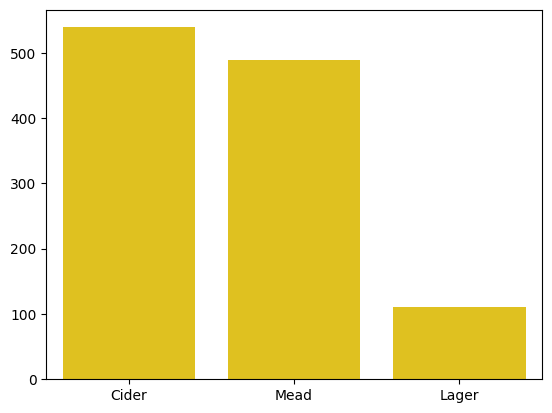

In [101]:
top_tres = inferior_ibu['tipo'].value_counts().nlargest(3)
sns.barplot(x=top_tres.index, y=top_tres.values)
plt.xlabel('')

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_15228\2403268344.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_tres.index, x=top_tres.values, palette="viridis")


Text(0.5, 0, '')

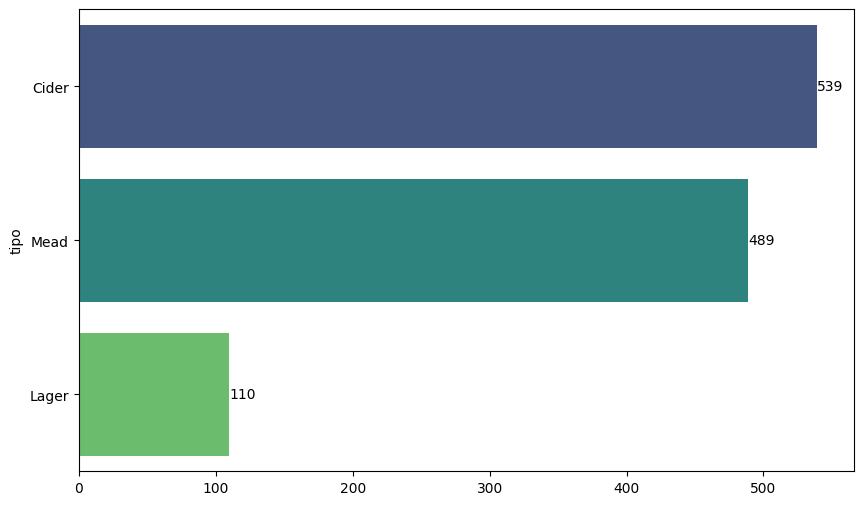

In [102]:
# Obtener los tres tipos más comunes en 'inferior_ibu'
top_tres = inferior_ibu['tipo'].value_counts().nlargest(3)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=top_tres.index, x=top_tres.values, palette="viridis")

# Añadir anotaciones de los valores encima de las barras
for i, value in enumerate(top_tres.values):
    ax.text(value, i, f'{value}', ha='left', va='center')

# Eliminar etiquetas del eje x
plt.xlabel('')

In [ ]:
#a continuación haremos un tratamiento similar para el valor ABV (contenido alcohólico)
# primero calculamos el intervalo intercuartílico
Q1 = df_cervezas.abv.quantile(0.25)
Q3 = df_cervezas.abv.quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites de los bigotes para 'abv'
limite_inferior= Q1 - 1.5 * IQR
limite_superior= Q3 + 1.5 * IQR

# Identificar valores atípicos para 'abv'
atipicos_abv_superior = df_cervezas[(df_cervezas.abv > limite_superior)]
atipicos_abv_inferior = df_cervezas[(df_cervezas.abv < limite_inferior)]


In [104]:
atipicos_abv_superior.sort_values(by='abv', ascending=False)

,name,style,abv,ibu,brewer_name,tipo
8365,Border Battle Porter,Brown Porter,81.0,57.0,North River Brewing Company,Porter
18042,Everything Rhymes With Orange,American-Style India Pale Ale,80.0,50.0,Roughtail Brewing Company,India Pale Ale
33111,Midnight Cab,French & Belgian-Style Saison,75.0,55.0,Rahr & Sons Brewing Company,Session
13747,Crunchy Hippie,American-Style Brown Ale,63.8,40.0,Earnest Brew Works,Ale
21444,Golden Mustache,Dortmunder / European-Style Export,55.0,26.0,Oak Highlands Brewery,Lager
...,...,...,...,...,...,...
26414,Imperial IPA,Imperial or Double India Pale Ale,11.2,100.0,Brickway Brewery,India Pale Ale
4781,Batch #1: Belgiweizen (County Line Ales),Specialty Beer,11.2,52.5,Good People Brewing Company,Special
38850,Peated Imperial Stout,British-Style Imperial Stout,11.2,60.0,Brouwerij Kees,Stout
4819,Batch 100,American-Style Imperial Stout,11.2,60.0,Tapistry Brewing,Stout


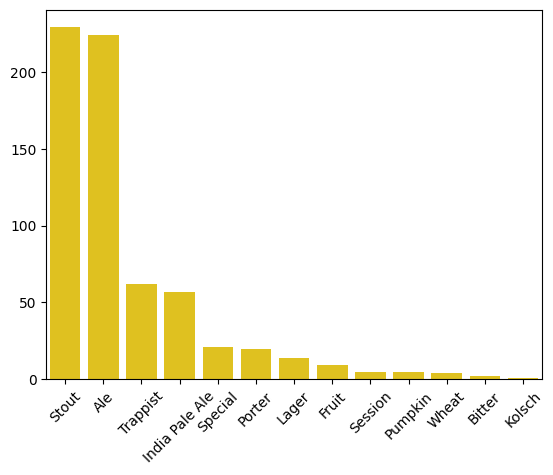

In [74]:
conteo_tipos = atipicos_abv_superior['tipo'].value_counts()
sns.barplot(x=conteo_tipos.index, y=conteo_tipos.values)
plt.xticks(rotation=45);
plt.xlabel('');
plt.ylabel('');

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_15228\535105859.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=conteo_tipos.index, x=conteo_tipos.values, palette="viridis")


Text(0.5, 0, '')

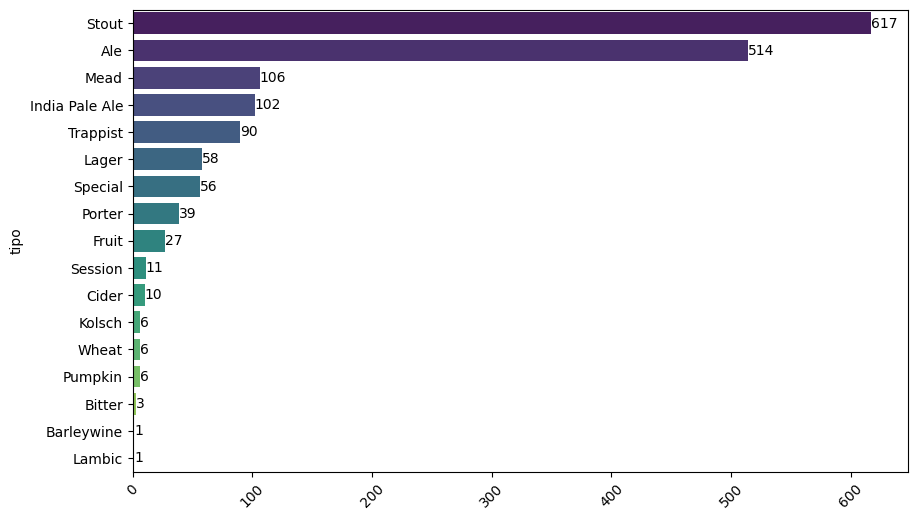

In [105]:
conteo_tipos = atipicos_abv_superior['tipo'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=conteo_tipos.index, x=conteo_tipos.values, palette="viridis")

for i, value in enumerate(conteo_tipos.values):
    ax.text(value, i, f'{value}', ha='left', va='center')

#plt.xticks(rotation=45)

plt.xlabel('')

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_15228\3236581601.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=conteo_tipos.index, x=conteo_tipos.values, palette="viridis")


Text(0.5, 0, '')

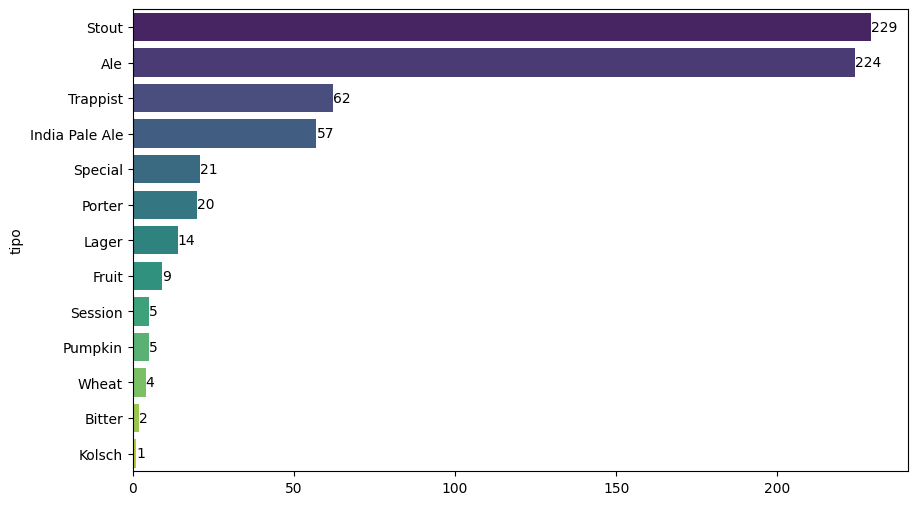

In [76]:
conteo_tipos = atipicos_abv_superior['tipo'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=conteo_tipos.index, x=conteo_tipos.values, palette="viridis")

for i, (value, name) in enumerate(zip(conteo_tipos.values, conteo_tipos.index)):
    ax.text(value, i, f'{value}', ha='left', va='center')

ax.set_xlabel('')

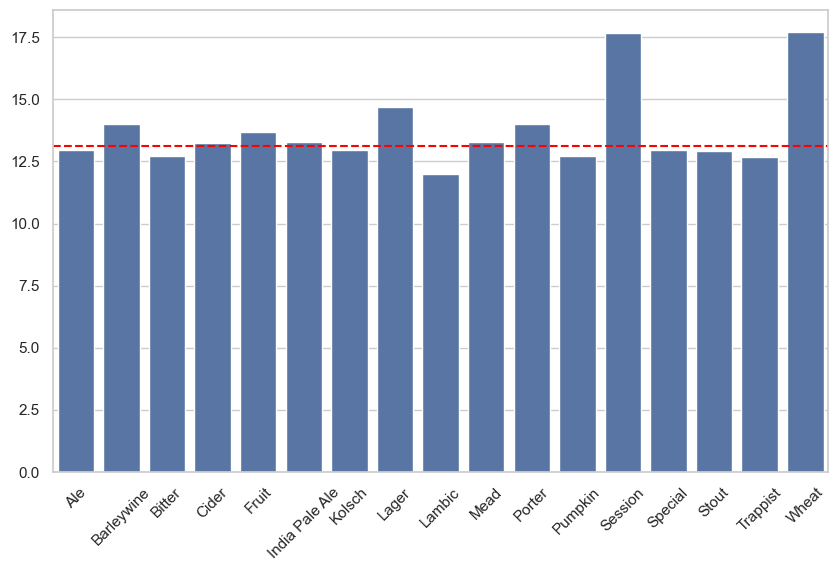

In [131]:
media_abv_por_tipo = atipicos_abv_superior.groupby('tipo')['abv'].mean()
media_total_abv = atipicos_abv_superior['abv'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=media_abv_por_tipo.index, y=media_abv_por_tipo.values)

plt.axhline(media_total_abv, color='red', linestyle='--', label=f'Media total: {media_total_abv:.2f}')

plt.xticks(rotation=45);
plt.xlabel('');

In [132]:
atipicos_abv_inferior.sort_values(by='abv')

,name,style,abv,ibu,brewer_name,tipo
29216,Kom-Brew-Cha,Blood Orange Cranberry (Tonic),0.1,17.0,Long Beach Beer Lab,Fruit
6618,Bitburger Alkoholfrei,German-Style Leichtbier,0.1,17.0,Bitburger Brauerei,Lager
6564,Birra Moretti Zero,Non-Alcoholic (Beer) Malt Beverages,0.1,17.0,Birra Moretti,Lager
2646,Amstel Malt,German-Style Leichtbier,0.1,17.0,Amstel Brewery,Lager
55487,Welde Naturradler Non-Alcoholic,Fruit Beer,0.2,15.0,Weldebräu GmbH & Co. KG,Fruit
...,...,...,...,...,...,...
25847,Huckleberry Lager,American-Style Lager,1.1,17.0,Wallace Brewing Company,Lager
22675,Half-Wit Wheat,Light American Wheat Ale or Lager with Yeast,1.1,5.0,Wichita Brewing Company,Lager
56450,Winter Ale,American-Style India Pale Ale,1.1,40.0,D.L. Geary Brewing Company,India Pale Ale
32088,Maltosa,Belgian-Style Table Beer,1.2,17.0,Haacht,Lager


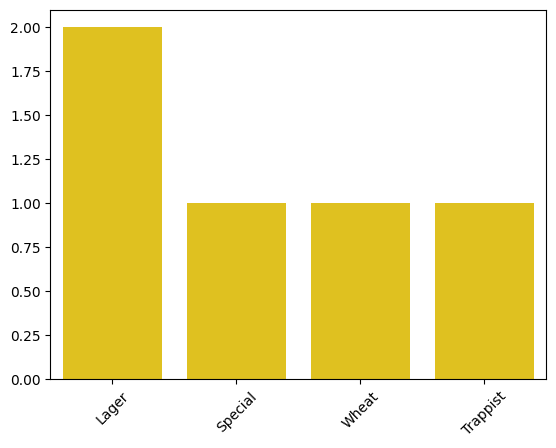

In [77]:
conteo_tipos = atipicos_abv_inferior['tipo'].value_counts()
sns.barplot(x=conteo_tipos.index, y=conteo_tipos.values)
plt.xticks(rotation=45);
plt.xlabel('');
plt.ylabel('');

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_15228\2795624193.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=conteo_tipos.index, x=conteo_tipos.values, palette="viridis")


Text(0.5, 0, '')

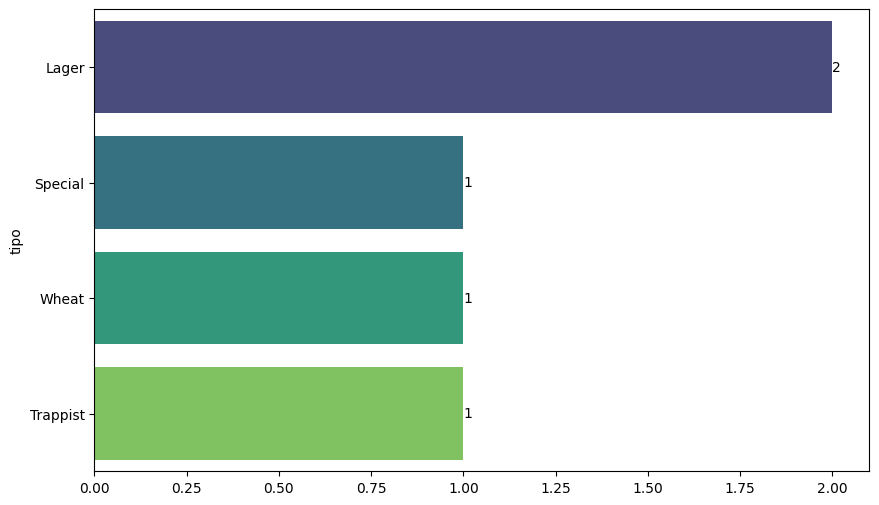

In [78]:
conteo_tipos = atipicos_abv_inferior['tipo'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=conteo_tipos.index, x=conteo_tipos.values, palette="viridis")

for i, (value, name) in enumerate(zip(conteo_tipos.values, conteo_tipos.index)):
    ax.text(value, i, f'{value}', ha='left', va='center')

ax.set_xlabel('')

In [134]:
df_atipicos = pd.concat([atipicos_abv_superior, atipicos_abv_inferior, atipicos_ibu, inferior_ibu])
df_filtrado = df_cervezas.merge(df_atipicos, indicator=True, how='outer').query("_merge == 'left_only'").drop(columns=['_merge'])

In [135]:
df_cervezas.to_csv("cervezas.csv", index=False)
atipicos_ibu.to_csv("atipicos_ibu_superior.csv", index=False)
inferior_ibu.to_csv("atipicos_ibu_inferior.csv", index=False)
atipicos_abv_superior.to_csv("atipicos__superior.csv", index=False)
atipicos_abv_inferior.to_csv("atipicos_abv_inferior.csv", index=False)
df_filtrado.to_csv("cervezas_final.csv", index=False)


In [81]:
df_filtrado = pd.read_csv("cervezas_final.csv")
df_filtrado

,name,style,abv,ibu,brewer_name,tipo
0,"""18"" Imperial IPA 2",American-Style Imperial Stout,11.1,60.0,Ship Bottom Brewery,Stout
1,"""633"" American Pale Ale",American-Style Pale Ale,6.3,25.0,"Boothbay Craft Brewery, Inc",Ale
2,"""Admiral"" Stache",Baltic-Style Porter,7.0,23.0,Milwaukee Brewing Company,Porter
3,"""Ah Me Joy"" Porter",Robust Porter,5.4,51.0,GAEL Brewing Company,Porter
4,"""Alternating Currant"" Sour",American-Style Sour Ale,4.8,12.0,Little Machine Beer,Ale
...,...,...,...,...,...,...
54661,“Furbelly” Irish Stout,Classic Irish-Style Dry Stout,4.5,60.0,Forest City Brewery,Stout
54662,“Last of the Red Hot Lagers”,American-Style Lager,4.3,20.0,Moccasin Bend Brewing Company,Lager
54663,“Make it so” Marzen Lager,German-Style Märzen,4.3,20.0,Nexus Brewery,Lager
54664,“O!” Gold Light Lager,American-Style Light (Low Calorie) Lager,3.8,17.0,Upstream Brewing Company,Lager


In [137]:

media_por_tipo = df_filtrado.groupby('tipo').agg({'ibu': 'mean', 'abv': 'mean'}).round(2)
media_por_tipo_ibu = media_por_tipo.sort_values(by='ibu', ascending=False)
media_por_tipo_abv = media_por_tipo.sort_values(by='abv', ascending=False)


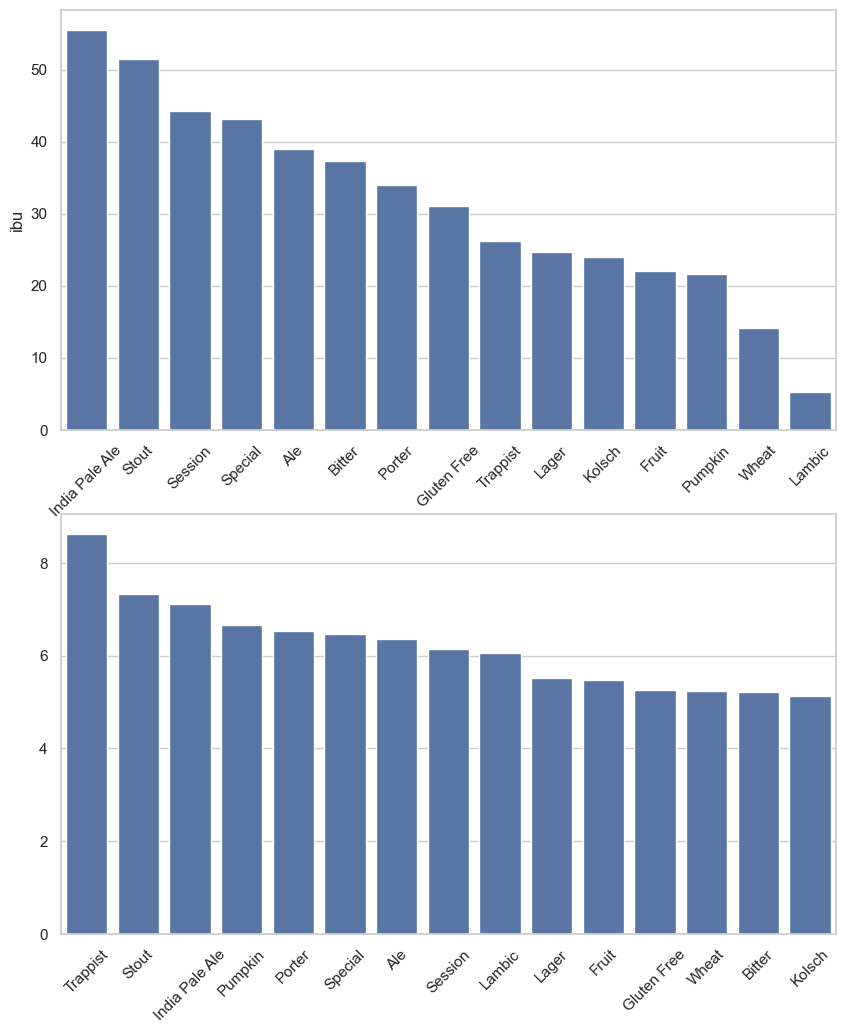

In [138]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))
sns.barplot(ax=axes[0], data=media_por_tipo_ibu, x="tipo", y="ibu")
sns.barplot(ax=axes[1], data=media_por_tipo_abv, x="tipo", y="abv")
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)
plt.xlabel('');
plt.ylabel('');

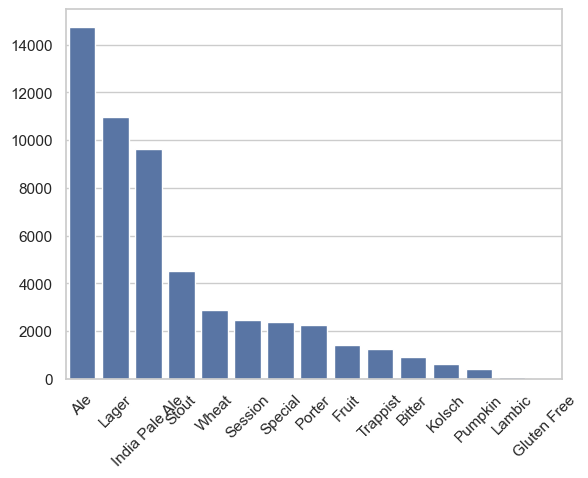

In [139]:
sns.countplot(data=df_filtrado, x='tipo', order=df_filtrado['tipo'].value_counts().index)
plt.xticks(rotation=45);
plt.xlabel('');
plt.ylabel('');


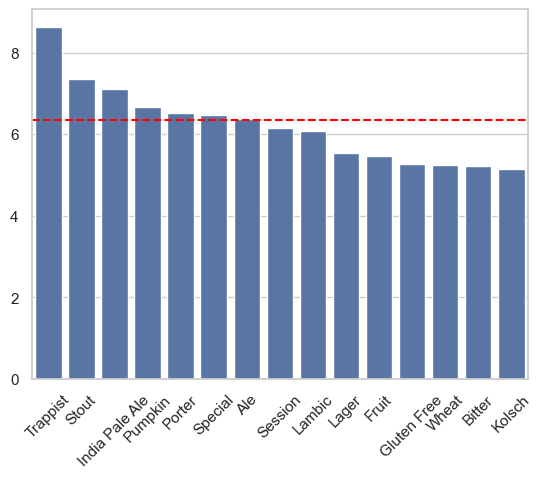

In [142]:
media_abv_por_tipo = df_filtrado.groupby('tipo')['abv'].mean().sort_values(ascending=False)
media_total_abv = df_filtrado['abv'].mean()

sns.barplot(x=media_abv_por_tipo.index, y=media_abv_por_tipo.values)
plt.axhline(media_total_abv, color='red', linestyle='--', label=f'Media total: {media_total_abv:.2f}')
plt.xlabel('');
plt.xticks(rotation=45);

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_15228\647173304.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=media_abv_por_tipo.index, x=media_abv_por_tipo.values, palette="viridis")


Text(0.5, 1.0, 'Valores Medios')

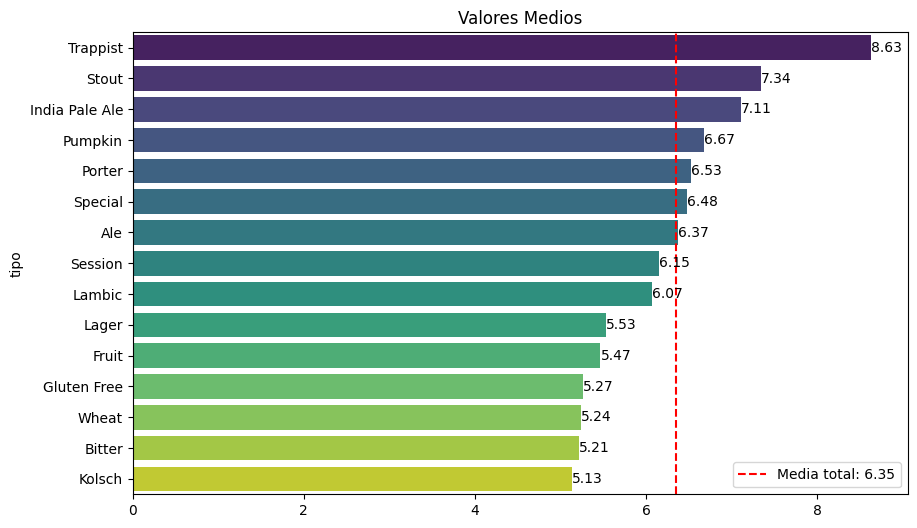

In [83]:
media_total_abv = df_filtrado['abv'].mean()
media_abv_por_tipo = df_filtrado.groupby('tipo')['abv'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=media_abv_por_tipo.index, x=media_abv_por_tipo.values, palette="viridis")

plt.axvline(media_total_abv, color='red', linestyle='--', label=f'Media total: {media_total_abv:.2f}')

for i, (value, name) in enumerate(zip(media_abv_por_tipo.values, media_abv_por_tipo.index)):
    ax.text(value, i, f'{value:.2f}', ha='left', va='center')

ax.set_xlabel('')

plt.legend()

plt.title('Valores Medios')

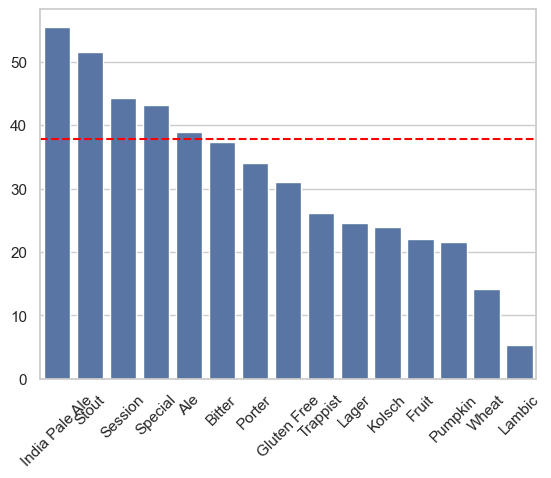

In [144]:
media_ibu_por_tipo = df_filtrado.groupby('tipo')['ibu'].mean().sort_values(ascending=False)
media_total_abv = df_filtrado['ibu'].mean()

sns.barplot(x=media_ibu_por_tipo.index, y=media_ibu_por_tipo.values)
plt.axhline(media_total_ibu, color='red', linestyle='--', label=f'Media total: {media_total_ibu:.2f}')
plt.xlabel('');
plt.xticks(rotation=45);

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_15228\2650961024.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=media_ibu_por_tipo.index, x=media_ibu_por_tipo.values, palette="viridis")


Text(0.5, 1.0, 'Valores Medios')

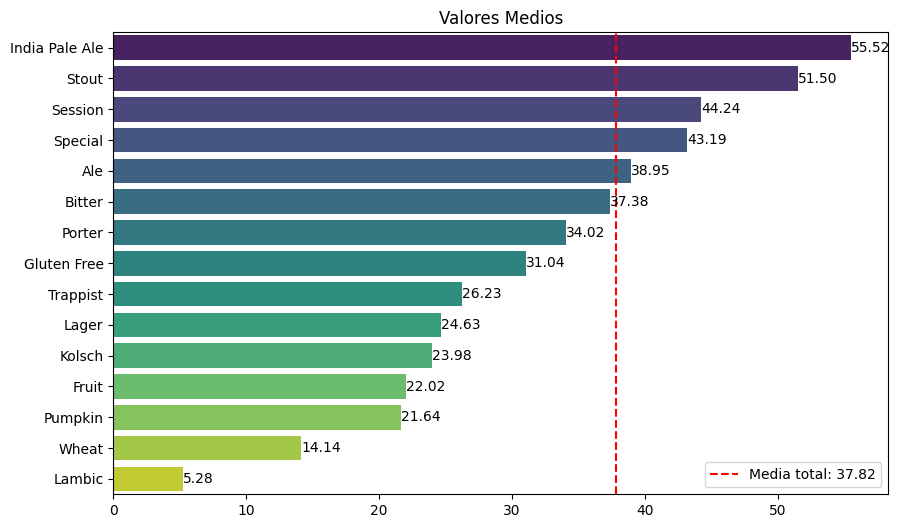

In [85]:
media_total_ibu = df_filtrado['ibu'].mean()

media_ibu_por_tipo = df_filtrado.groupby('tipo')['ibu'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=media_ibu_por_tipo.index, x=media_ibu_por_tipo.values, palette="viridis")

plt.axvline(media_total_ibu, color='red', linestyle='--', label=f'Media total: {media_total_ibu:.2f}')

for i, (value, name) in enumerate(zip(media_ibu_por_tipo.values, media_ibu_por_tipo.index)):
    ax.text(value, i, f'{value:.2f}', ha='left', va='center')

ax.set_ylabel('')

plt.legend()

plt.title('Valores Medios')